## Goal- To make a predictive model for CO2 Emission and compare between the models

#### Importing libraries

In [35]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [36]:
df1=pd.read_csv('co2_emission.csv',parse_dates=[2])

In [37]:
df1.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949-01-01,14656.0
1,Afghanistan,AFG,1950-01-01,84272.0
2,Afghanistan,AFG,1951-01-01,91600.0
3,Afghanistan,AFG,1952-01-01,91600.0
4,Afghanistan,AFG,1953-01-01,106256.0


#### Shape of data

In [38]:
df1.shape

(20853, 4)

In [39]:
# Selecting the columns which we need 
df=df1[['Year', 'Annual CO₂ emissions (tonnes )']]

In [40]:
df.head()

,Year,Annual CO₂ emissions (tonnes )
0,1949-01-01,14656.0
1,1950-01-01,84272.0
2,1951-01-01,91600.0
3,1952-01-01,91600.0
4,1953-01-01,106256.0


#### Null values

In [41]:
df.isnull().sum()
# our data has no null values

Year                              0
Annual CO₂ emissions (tonnes )    0
dtype: int64

In [42]:
# Function to convert values of Avg co2 emission into millions
def to_millions(x):
    return x/1000000

In [43]:
df['Annual CO₂ emissions (tonnes )']=df['Annual CO₂ emissions (tonnes )'].apply(to_millions)

In [44]:
# Resampling avg_co2 on basis of year
df=df.resample('A',on='Year').mean() 

In [45]:
df.columns=['Annual CO₂ emissions (millions )']

## Stationary data

In [46]:
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [48]:
result = adfuller(df['Annual CO₂ emissions (millions )'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 2.42603591953288
p-value: 0.9990220403498531
Critical Values:
	1%: -3.455952927706342
	5%: -2.8728086526320302
	10%: -2.572774990685656


In [49]:
# data is not stationary so we make data stationary as for Time series analysis data should be instationary form

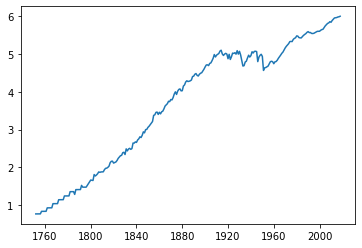

In [50]:
df_log = np.log(df)
plt.plot(df_log)

In [53]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Annual CO₂ emissions (millions )'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

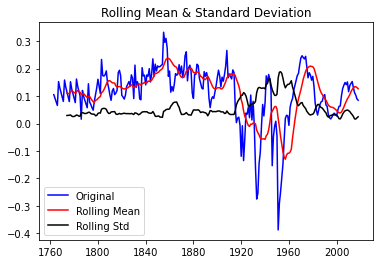

ADF Statistic: -4.412180802027577
p-value: 0.0002824404232684573
Critical Values:
	1%: -3.4562572510874396
	5%: -2.8729420379793598
	10%: -2.5728461399461744


In [54]:
rolling_mean = df_log.rolling(window=12).mean()
dfs = df_log - rolling_mean
dfs.dropna(inplace=True)
get_stationarity(dfs)

## TRAIN TEST SPLIT

In [55]:
dfs.columns=['Annual CO₂ emissions (millions )']

In [56]:
train_data = dfs[:len(dfs)-80]
test_data = dfs[len(dfs)-80:]

# ARIMA Model

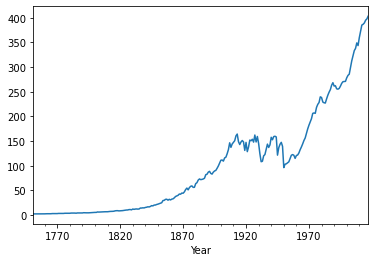

In [60]:
df['Annual CO₂ emissions (millions )'].plot()

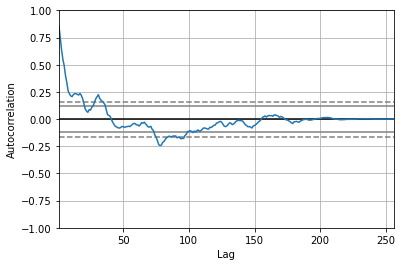

In [61]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dfs['Annual CO₂ emissions (millions )'])

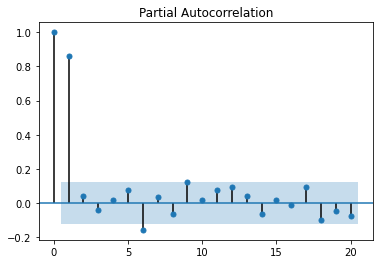

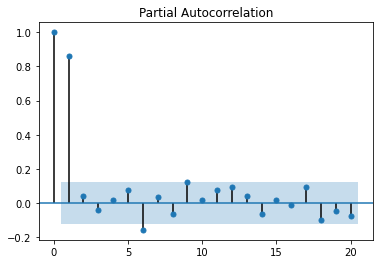

In [62]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dfs['Annual CO₂ emissions (millions )'], lags=20)

In [63]:
model = ARIMA(dfs['Annual CO₂ emissions (millions )'], order=(5,0,2))

In [64]:
model_fit=model.fit()

In [65]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     ARMA Model Results                                     
============================================================================================
Dep. Variable:     Annual CO₂ emissions (millions )   No. Observations:                  256
Model:                                   ARMA(5, 2)   Log Likelihood                 399.615
Method:                                     css-mle   S.D. of innovations              0.051
Date:                              Sun, 27 Jun 2021   AIC                           -781.230
Time:                                      01:42:16   BIC                           -749.323
Sample:                                  12-31-1762   HQIC                          -768.397
                                       - 12-31-2017                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.1092      0.023      4.806      0.000       0.065       0.154
ar.L1.Annual CO₂ emissions (millions )    -0.2055      0.393     -0.524      0.601      -0.975       0.564
ar.L2.Annual CO₂ emissions (millions )     0.7177      0.098      7.303      0.000       0.525       0.910
ar.L3.Annual CO₂ emissions (millions )     0.1778      0.323      0.550      0.582      -0.456       0.811
ar.L4.Annual CO₂ emissions (millions )    -0.0980      0.070     -1.394      0.163      -0.236       0.040
ar.L5.Annual CO₂ emissions (millions )     0.0999      0.082      1.212      0.226      -0.062       0.262
ma.L1.Annual CO₂ emissions (millions )     1.0573      0.392      2.695      0.007       0.288       1.826
ma.L2.Annual CO₂ emissions (millions )     0.2108      0.350      0.603      0.547      -0.475       0.896
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1733           -0.4617j            1.2608           -0.4403
AR.2           -1.1733           +0.4617j            1.2608            0.4403
AR.3            1.1447           -0.0000j            1.1447           -0.0000
AR.4            1.0913           -2.0755j            2.3449           -0.1730
AR.5            1.0913           +2.0755j            2.3449            0.1730
MA.1           -1.2646           +0.0000j            1.2646            0.5000
MA.2           -3.7517           +0.0000j            3.7517            0.5000
-----------------------------------------------------------------------------
"""

In [66]:
test_data

,Annual CO₂ emissions (millions )
Year,
1938-12-31,0.027585
1939-12-31,0.075635
1940-12-31,0.173435
1941-12-31,0.144821
1942-12-31,0.178465
...,...
2013-12-31,0.130916
2014-12-31,0.112080
2015-12-31,0.103207


In [67]:
arima_pred = model_fit.predict(start ='1938', end = '2017', typ="levels").rename("ARIMA Predictions")
arima_pred

Year
1938-12-31    0.079590
1939-12-31    0.034122
1940-12-31    0.073581
1941-12-31    0.163706
1942-12-31    0.147094
                ...   
2013-12-31    0.151184
2014-12-31    0.121589
2015-12-31    0.116911
2016-12-31    0.099251
2017-12-31    0.098571
Freq: A-DEC, Name: ARIMA Predictions, Length: 80, dtype: float64

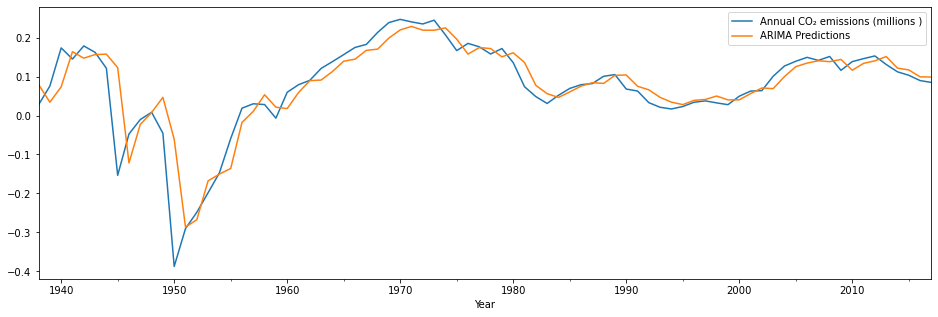

In [69]:
test_data['Annual CO₂ emissions (millions )'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [70]:
arima_rmse_error = rmse(test_data['Annual CO₂ emissions (millions )'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = dfs['Annual CO₂ emissions (millions )'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')


MSE Error: 0.0031604187744716503
RMSE Error: 0.056217601998588045
Mean: 0.10993168404788159


In [71]:
mse_list={}
mse_list['Arima']=arima_mse_error

In [72]:
test_data['ARIMA_Predictions'] = arima_pred

### Forecasting with ARIMA

Text(0.5, 1.0, 'Forecasting with ARIMA')

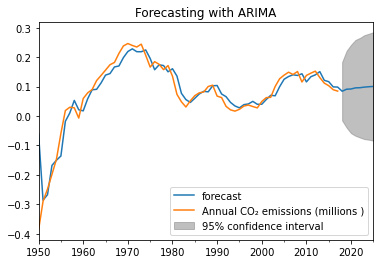

In [73]:
model_fit.plot_predict(start='1950',end='2025')                      
plt.title('Forecasting with ARIMA')

## LSTM

In [74]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [75]:
# fix random seed for reproducibility
import numpy
numpy.random.seed(7)

In [76]:
dataset = dfs['Annual CO₂ emissions (millions )'].values
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))

In [77]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [78]:
# split into train and test sets
train_size = int(len(dataset) * 0.68)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [79]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [80]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [81]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [82]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=150, batch_size=1, verbose=2)

Epoch 1/150
172/172 - 0s - loss: 0.2999
Epoch 2/150
172/172 - 0s - loss: 0.0773
Epoch 3/150
172/172 - 0s - loss: 0.0167
Epoch 4/150
172/172 - 0s - loss: 0.0091
Epoch 5/150
172/172 - 0s - loss: 0.0086
Epoch 6/150
172/172 - 0s - loss: 0.0085
Epoch 7/150
172/172 - 0s - loss: 0.0083
Epoch 8/150
172/172 - 0s - loss: 0.0082
Epoch 9/150
172/172 - 0s - loss: 0.0080
Epoch 10/150
172/172 - 0s - loss: 0.0079
Epoch 11/150
172/172 - 0s - loss: 0.0077
Epoch 12/150
172/172 - 0s - loss: 0.0076
Epoch 13/150
172/172 - 0s - loss: 0.0074
Epoch 14/150
172/172 - 0s - loss: 0.0073
Epoch 15/150
172/172 - 0s - loss: 0.0070
Epoch 16/150
172/172 - 0s - loss: 0.0069
Epoch 17/150
172/172 - 0s - loss: 0.0069
Epoch 18/150
172/172 - 0s - loss: 0.0066
Epoch 19/150
172/172 - 0s - loss: 0.0065
Epoch 20/150
172/172 - 0s - loss: 0.0063
Epoch 21/150
172/172 - 0s - loss: 0.0061
Epoch 22/150
172/172 - 0s - loss: 0.0060
Epoch 23/150
172/172 - 0s - loss: 0.0059
Epoch 24/150
172/172 - 0s - loss: 0.0058
Epoch 25/150
172/172 - 0s

In [83]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.05 RMSE
Test Score: 0.06 RMSE


In [84]:
testScore = mean_squared_error(testY[0], testPredict[:,0])
testScore

0.0034339483713172773

In [85]:
test_data['LSTM_Predictions'] = testPredict

In [86]:
mse_list['LSTM']=testScore

# Linear regression

In [87]:
df=dfs.copy()

In [88]:
df['lag1']=df['Annual CO₂ emissions (millions )'].shift(1)
df['lag2']=df['Annual CO₂ emissions (millions )'].shift(2)
df['lag3']=df['Annual CO₂ emissions (millions )'].shift(3)
df.dropna(inplace=True)

In [89]:
x1,x2,x3,y=df['lag1'],df['lag2'],df['lag3'],df['Annual CO₂ emissions (millions )']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(final_x,y,test_size=80, random_state=42)

In [91]:
#Import library for accuracy score
from sklearn.metrics import accuracy_score

In [92]:
from sklearn.linear_model import LinearRegression
linear =LinearRegression()
# Train the model using training dataset
linear.fit(x_train, y_train)
#Prediction using test data
y_pred=linear.predict(x_test)

In [93]:
mse = mean_squared_error(y_test,y_pred)
mse

0.003950228984027286

In [94]:
mse_list['Linear Regression']=mse

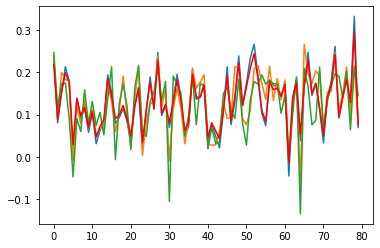

In [95]:
plt.plot(x_test)
plt.plot(y_pred,color='red')

In [96]:
test_data['Linear Regression']=y_pred

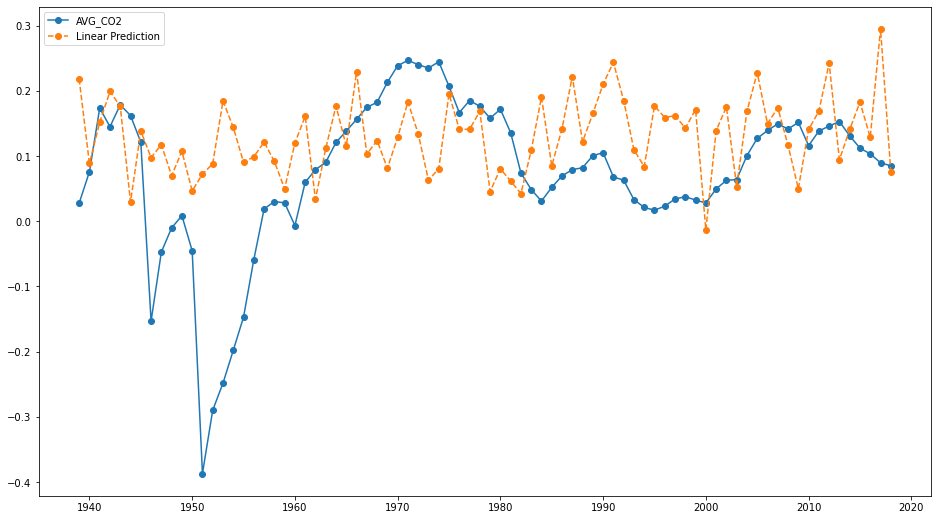

In [97]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Annual CO₂ emissions (millions )"], linestyle="-",label='AVG_CO2')
plt.plot_date(test_data.index, test_data["Linear Regression"], linestyle="--",label='Linear Prediction')
plt.legend()
plt.show()

## Random Forest

In [98]:
#Import Library for Random Forest
from sklearn.ensemble import RandomForestRegressor
#Initialize the Random Forest
model = RandomForestRegressor()
#Train the model using Training Dataset
model.fit(x_train,y_train)
#Prediction using test data
y_pred=model.predict(x_test)


In [99]:
test_data['Random Forest']=y_pred

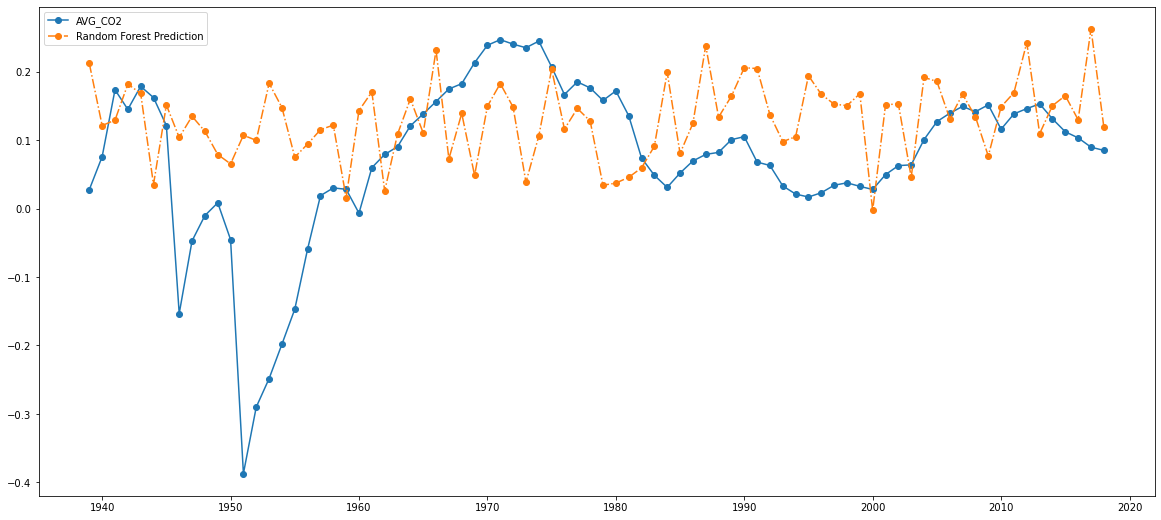

In [100]:
plt.figure(figsize=(20,9))
plt.plot_date(test_data.index, test_data["Annual CO₂ emissions (millions )"], linestyle="-",label='AVG_CO2')
plt.plot_date(test_data.index, test_data["Random Forest"], linestyle="-.",label='Random Forest Prediction')
#plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--",label='LSTM Prediction')
plt.legend()
plt.show()

In [101]:
mse = mean_squared_error(y_test,y_pred)
mse

0.004549200745873517

In [102]:
mse_list['Random Forest']=mse

In [103]:
MSE = pd.DataFrame(list(mse_list.items()))

In [104]:
MSE.columns=['Models','MSE_Values']

In [105]:
MSE

,Models,MSE_Values
0,Arima,0.003160
1,LSTM,0.003434
2,Linear Regression,0.003950
3,Random Forest,0.004549


In [106]:
test_data

,Annual CO₂ emissions (millions ),ARIMA_Predictions,LSTM_Predictions,Linear Regression,Random Forest
Year,,,,,
1938-12-31,0.027585,0.079590,0.006292,0.218040,0.211964
1939-12-31,0.075635,0.034122,0.076854,0.088523,0.121226
1940-12-31,0.173435,0.073581,0.040079,0.151766,0.129122
1941-12-31,0.144821,0.163706,0.082340,0.199009,0.181666
1942-12-31,0.178465,0.147094,0.163915,0.176115,0.168151
...,...,...,...,...,...
2013-12-31,0.130916,0.151184,0.141658,0.140668,0.150207
2014-12-31,0.112080,0.121589,0.147279,0.182675,0.164797
2015-12-31,0.103207,0.116911,0.129285,0.128579,0.129589


## Comparitive study of models

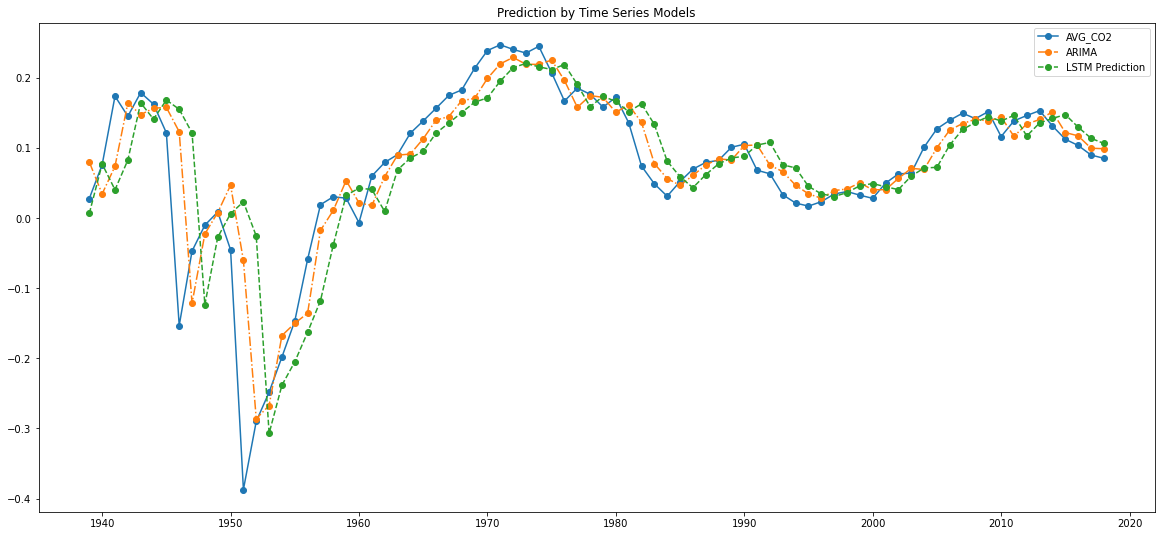

In [107]:
plt.figure(figsize=(20,9))
plt.plot_date(test_data.index, test_data["Annual CO₂ emissions (millions )"], linestyle="-",label='AVG_CO2')
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.",label='ARIMA')
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--",label='LSTM Prediction')
plt.legend()
plt.title('Prediction by Time Series Models')
plt.show()

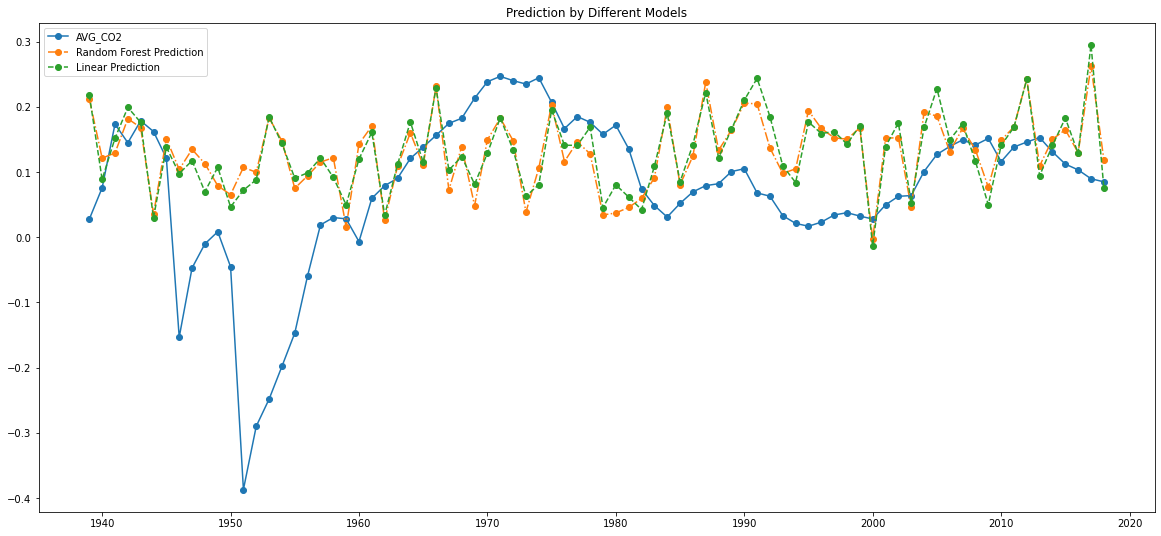

In [108]:
plt.figure(figsize=(20,9))
plt.plot_date(test_data.index, test_data["Annual CO₂ emissions (millions )"], linestyle="-",label='AVG_CO2')
plt.plot_date(test_data.index, test_data["Random Forest"], linestyle="-.",label='Random Forest Prediction')
plt.plot_date(test_data.index, test_data["Linear Regression"], linestyle="--",label='Linear Prediction')
plt.legend()
plt.title('Prediction by Different Models')
plt.show()

In [109]:
MSE

,Models,MSE_Values
0,Arima,0.003160
1,LSTM,0.003434
2,Linear Regression,0.003950
3,Random Forest,0.004549


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'MSE values of different models')

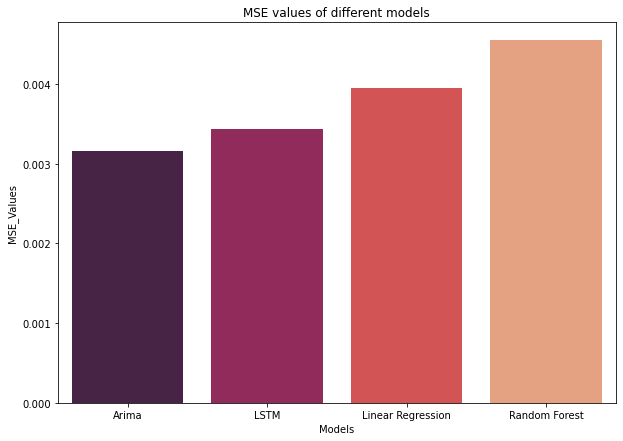

In [110]:
plt.subplots(figsize=(10,7))
sns.barplot(x='Models',y='MSE_Values',data=MSE , palette='rocket',)
plt.title('MSE values of different models')